> Antes de tudo, segue a lista com os pacotes instalados na env usada para o desafio, de forma a ter documentado caso seja necessário rodar novamente.

In [1]:
!pip list

Package                           Version
--------------------------------- -------------
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.2
anaconda-project                  0.11.1
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.1
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.3.4
asttokens                         2.0.5
async-lru                         2.0.4
atomicwrites            

## Imports e settings iniciais

Aqui temos os imports mais básicos, que serão usados ao longo de todo notebook.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings

Mudando alguns settings, tais quais o formato numérico e o número máximo de display de colunas e linhas.

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.options.display.float_format = '{:.2f}'.format

## Lendo a base 

In [5]:
base = pd.read_csv('base_modelo.csv')
base.head()

,id,safra,y,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,VAR_21,VAR_22,VAR_23,VAR_24,VAR_25,VAR_26,VAR_27,VAR_28,VAR_29,VAR_30,VAR_31,VAR_32,VAR_33,VAR_34,VAR_35,VAR_36,VAR_37,VAR_38,VAR_39,VAR_40,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50,VAR_51,VAR_52,VAR_53,VAR_54,VAR_55,VAR_56,VAR_57,VAR_58,VAR_59,VAR_60,VAR_61,VAR_62,VAR_63,VAR_64,VAR_65,VAR_66,VAR_67,VAR_68,VAR_69,VAR_70,VAR_71,VAR_72,VAR_73,VAR_74,VAR_75,VAR_76,VAR_77,VAR_78
0,1,201404,0,0.00,0.00,0.00,0.00,124.54,3277.00,51.98,NaN,500.00,153.00,NaN,299.00,73.26,1024.00,26.98,162.00,3000.00,72.00,45.00,8,1279.00,63.00,77.67,492.84,12.00,845.00,NaN,12.00,16.00,500.00,22.00,0.13,18.00,NaN,NaN,0.00,16.00,220.84,348.00,9.00,9.57,33.00,19.00,11.00,512.82,36.00,0.00,16.00,0.00,159.28,379.00,53.97,3380.00,500.00,159.28,159.28,45,369.00,95.54,-0.03,0.00,2508.00,159.28,0,1303.79,8.00,-69.00,16.00,156.38,7.52,0.00,151.00,0.00,3.00,477.84,173.06,0.00,3.00
1,2,201407,0,64.00,0.00,2.00,1.00,47.92,2443.00,84.72,NaN,1000.00,649.00,NaN,224.00,38.53,NaN,NaN,84.00,NaN,50.00,18.00,12,1063.00,31.00,177.39,335.44,9.00,NaN,842.00,10.00,NaN,1000.00,14.00,0.13,13.00,NaN,NaN,NaN,NaN,338.90,179.00,5.00,NaN,NaN,19.00,9.00,269.71,NaN,0.00,NaN,NaN,NaN,NaN,NaN,1000.00,2000.00,NaN,NaN,60,228.00,97.73,0.36,NaN,836.00,NaN,0,1486.26,24.00,NaN,NaN,707.84,NaN,NaN,187.00,NaN,NaN,NaN,184.69,54.00,NaN
2,3,201405,0,99.00,2.00,2.00,2.00,80.38,1824.00,26.63,NaN,1893.35,346.00,29.98,106.00,NaN,NaN,73.55,8.00,NaN,3.00,2.00,12,116.00,4.00,140.25,362.71,3.00,NaN,597.00,5.00,NaN,1893.35,NaN,0.13,2.00,NaN,59.97,NaN,NaN,133.17,NaN,4.00,NaN,NaN,3.00,12.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,294.20,1893.35,1893.35,NaN,NaN,31,264.00,294.57,-0.41,NaN,NaN,NaN,0,800.27,18.00,NaN,NaN,471.86,NaN,NaN,96.00,NaN,NaN,NaN,732.00,121.98,NaN
3,4,201412,0,0.00,0.00,0.00,0.00,10.58,3796.00,NaN,NaN,3000.00,119.00,NaN,NaN,NaN,1609.00,NaN,36.00,1500.00,17.00,11.00,12,255.00,14.00,29.99,74.06,0.00,1238.00,NaN,0.00,5.00,3000.00,12.00,0.13,3.00,NaN,NaN,0.00,-1.00,NaN,NaN,5.00,NaN,7.00,NaN,6.00,NaN,7.00,0.00,NaN,NaN,NaN,594.00,NaN,3000.00,7000.00,287.31,NaN,76,49.00,NaN,0.72,5.75,NaN,287.31,0,NaN,4.00,-133.00,NaN,119.96,23.00,0.00,417.00,0.00,0.00,NaN,NaN,0.00,0.00
4,5,201403,1,0.00,0.00,0.00,0.00,70.46,437.00,40.69,10.99,2000.00,NaN,62.78,NaN,NaN,288.00,29.58,NaN,NaN,NaN,0.00,12,NaN,0.00,NaN,493.22,0.00,43.00,NaN,0.00,-9.00,2000.00,0.00,0.09,0.00,10.99,313.91,0.00,-9.00,326.89,NaN,0.00,0.00,-9.00,NaN,0.00,NaN,-9.00,NaN,-16.00,0.00,182.89,288.00,147.94,2946.29,2946.29,182.89,182.89,38,332.00,NaN,-0.23,NaN,NaN,NaN,1,1457.78,NaN,-272.00,-16.00,NaN,NaN,0.00,75.00,0.00,0.00,914.45,NaN,NaN,0.00


### First loop na base

> Uma pergunta que sempre gosto de responder de início é: Qual o Bad Rate da target ao longo do tempo, e o quão estável está a volumetria?

Com isso, tenho uma noção de o quão difícil o problema vai ser, se é desbalanceado, ou se há uma tendência ao longo do tempo.

In [6]:
base['id_'] = 1
volumetria = base.groupby('safra')['id_'].sum().reset_index()
base = base.drop(columns = ['id_'])

bad_rate = base.groupby('safra')['y'].mean().reset_index()

viz = pd.merge(volumetria, bad_rate, on = 'safra', how = 'inner')

viz['safra'] = viz['safra'].astype(str)

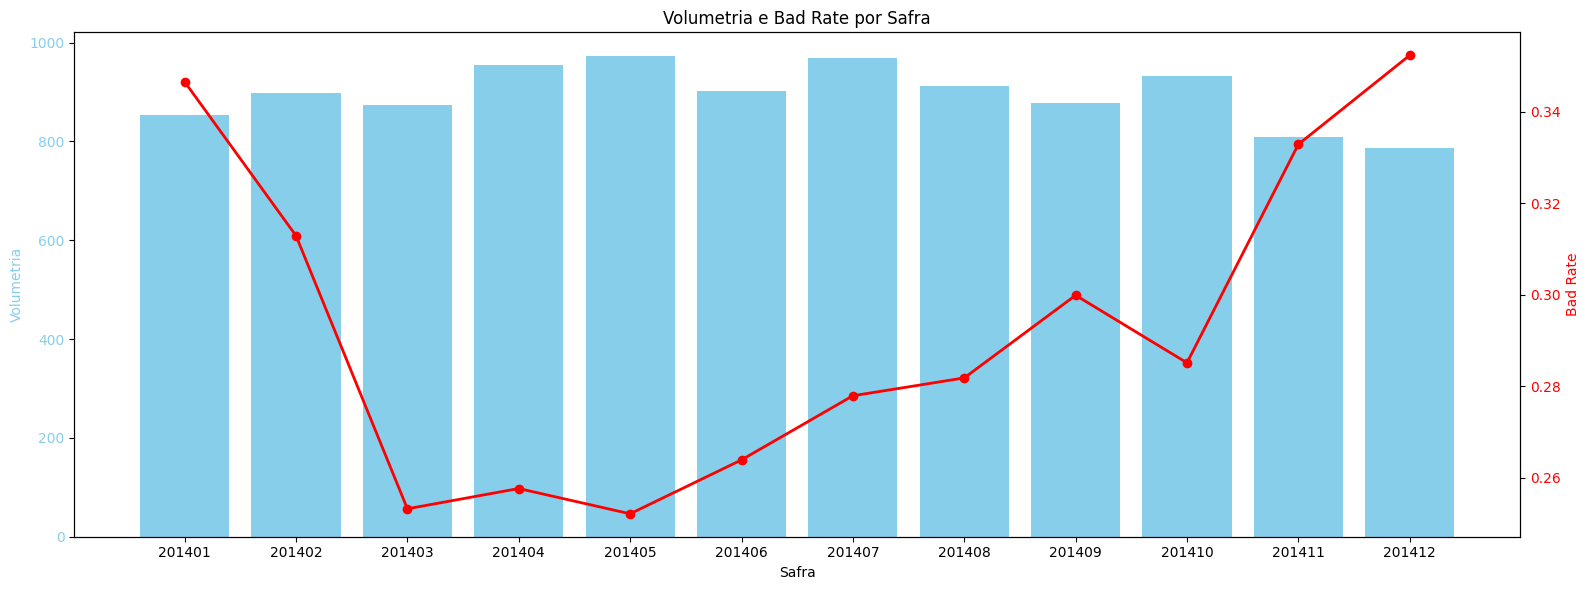

In [7]:
fig, ax1 = plt.subplots(figsize=(16, 6))

ax1.bar(viz['safra'], viz['id_'], color='skyblue', label='Volumetria')
ax1.set_xlabel('Safra')
ax1.set_ylabel('Volumetria', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

ax2 = ax1.twinx() 
ax2.plot(viz['safra'], viz['y'], color='red', marker='o', label='Bad Rate', linestyle='-', linewidth=2)
ax2.set_ylabel('Bad Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Volumetria e Bad Rate por Safra')
fig.tight_layout() 
plt.show()

Podemos notar que (apesar de haver certa vsssssariação) tanto a volumetria quanto o bad rate estão consideravalmente estável

### Deep dive na base

In [8]:
from scipy.stats import ks_2samp
from scipy.stats import pearsonr

Nesse bloco, a meta é simples: Entender um pouco do comportamento das variáveis. 

Note que as variáveis não tem descrição, logo toda inferência a respeito do comportamento dela, pode e provavelmente vai estar enviesado.

Com isso em mente, quero olhar duas coisas: A primeira é o número de missings na variável, e a segunda é seus números distintos.

Como estamos às escuras por aqui, sem saber o que cada variável significa, não vou retirar todas as variáveis com missings altos, pois pode ser importante para o problema. Minha lógica vai ser:
* Para as variáveis com pouca porcentagem de missings e alta variação de seus valores, vou imputar a média (forma mais simples).
* Para as variáveis com pouca correlação/ks com a target, e com algum grau de missing, vou jogar fora (limpeza das mais fracas)
* Para as demais (com missing alto mas com correlação com a target), vou imputar um número -9999, e verei se os modelos entendem esse missing como importante.

In [9]:
def sumario_estatistico(df):
    lista_ = []

    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  
            linha = {
                'Coluna': col,
                'num_missings': df[col].isna().sum(),
                'minimo': df[col].min(),
                'primeiro_quartil': df[col].quantile(0.25),
                'mediana': df[col].median(),
                'media': df[col].mean(),
                'terceiro_quartil': df[col].quantile(0.75),
                'valores_distintos': df[col].nunique(),
                'tamanho_base': df.shape[0],
            }
            lista_.append(linha)

    out = pd.DataFrame(lista_)

    return out

In [10]:
aux_estatisticas = sumario_estatistico(base)

In [11]:
aux_estatisticas['perc_missing'] = aux_estatisticas['num_missings']/aux_estatisticas['tamanho_base']

In [12]:
aux_estatisticas.sort_values(by = 'perc_missing', ascending = False)

,Coluna,num_missings,minimo,primeiro_quartil,mediana,media,terceiro_quartil,valores_distintos,tamanho_base,perc_missing
64,VAR_62,8377,418.00,418.00,836.00,1255.24,1672.00,20,10738,0.78
72,VAR_70,8259,0.00,0.00,2.17,4.89,7.36,779,10738,0.77
63,VAR_61,7658,0.00,0.00,0.00,3.42,5.30,650,10738,0.71
51,VAR_49,7296,0.00,0.00,1.31,4.00,6.34,798,10738,0.68
38,VAR_36,7268,0.00,0.00,0.00,3.85,6.23,731,10738,0.68
65,VAR_63,7245,32.32,137.42,178.74,194.33,235.42,1819,10738,0.67
45,VAR_43,7197,1.00,7.00,14.00,18.60,24.00,109,10738,0.67
14,VAR_12,7197,5.00,198.00,354.00,457.37,592.00,1112,10738,0.67
20,VAR_18,7123,1.00,15.00,33.00,57.19,75.00,299,10738,0.66
23,VAR_21,7123,1.00,349.00,789.00,1258.27,1670.00,2026,10738,0.66


In [13]:
aux_estatisticas[(aux_estatisticas['perc_missing'] <= 0.1) & 
                 (aux_estatisticas['perc_missing'] > 0) & 
                 (aux_estatisticas['valores_distintos'] > 20)]['Coluna'].values.tolist()

['VAR_1', 'VAR_6', 'VAR_19', 'VAR_22', 'VAR_30', 'VAR_33', 'VAR_72']

> As variáveis acima são variáveis com pouco missing, logo vamos imputar a média (operação será refeita no split entre treino e teste)

In [14]:
for var in ['VAR_1', 'VAR_6', 'VAR_19', 'VAR_22', 'VAR_30', 'VAR_33', 'VAR_72']:
    input = base[var].mean()
    base[var] = base[var].fillna(input)

> Vamos agora ver a correlação e o ks entre as variáveis e a target.

In [15]:
def teste_ks(df, y, lista_vars):
    df_ = df.copy()
    resultados = []
    
    for var in lista_vars:    
        if df_[var].dtype in ['int64', 'float64']:
            df_[var] = df_[var].fillna(-9999)
            group_0 = df_[df_[y] == 0][var]
            group_1 = df_[df_[y] == 1][var]
            
            ks_stat, ks_p_value = ks_2samp(group_0, group_1)

            corr, p_value = pearsonr(df_[var], df_[y])
            
            resultados.append({
                'explicativa': var,
                'ks': ks_stat,
                'pearsonr': corr,
                'p_valor_ks': ks_p_value,
                'p_valor_pearsonr':p_value
            }) 
    
    out = pd.DataFrame(resultados)
    
    return out

In [16]:
lista_explicativas = [col for col in base.columns if 'VAR' in col]

In [17]:
ks_results = teste_ks(base, 'y', lista_explicativas)

In [18]:
ks_results.sort_values(by = 'pearsonr', ascending = False)

,explicativa,ks,pearsonr,p_valor_ks,p_valor_pearsonr
0,VAR_1,0.27,0.33,0.00,0.00
19,VAR_20,0.15,0.17,0.00,0.00
63,VAR_64,0.15,0.14,0.00,0.00
8,VAR_9,0.12,0.12,0.00,0.00
37,VAR_38,0.06,0.04,0.00,0.00
6,VAR_7,0.05,0.04,0.00,0.00
33,VAR_34,0.06,0.04,0.00,0.00
7,VAR_8,0.05,0.04,0.00,0.00
1,VAR_2,0.20,0.04,0.00,0.00
3,VAR_4,0.26,0.04,0.00,0.00


In [19]:
ks_results = ks_results[(ks_results['p_valor_ks'] <= 0.05) | (ks_results['p_valor_pearsonr'] <= 0.05)][['explicativa', 'ks', 'pearsonr']]
ks_results['pearsonr'] = np.abs(ks_results['pearsonr'])

Quais são as explicativas com pouca interação com a target?

In [20]:
weak_explicativas = ks_results[ks_results['pearsonr'] <= 0.05].explicativa.values.tolist()

In [21]:
aux_estatisticas[aux_estatisticas['Coluna'].isin(weak_explicativas)].sort_values(by = 'perc_missing', ascending = False)

,Coluna,num_missings,minimo,primeiro_quartil,mediana,media,terceiro_quartil,valores_distintos,tamanho_base,perc_missing
51,VAR_49,7296,0.00,0.00,1.31,4.00,6.34,798,10738,0.68
13,VAR_11,4984,0.01,30.54,52.75,69.30,88.44,3813,10738,0.46
36,VAR_34,4833,0.98,110.35,222.28,299.51,391.02,4357,10738,0.45
10,VAR_8,4833,0.98,31.41,54.98,71.02,89.98,3963,10738,0.45
9,VAR_7,4632,0.01,30.27,53.15,67.84,85.98,3987,10738,0.43
40,VAR_38,4632,0.01,111.96,218.40,278.20,369.89,4420,10738,0.43
67,VAR_65,2239,0.00,368.62,749.40,1206.69,1442.76,7907,10738,0.21
4,VAR_2,416,0.00,0.00,0.00,0.37,0.00,16,10738,0.04
6,VAR_4,416,0.00,0.00,0.00,0.58,1.00,14,10738,0.04
5,VAR_3,416,0.00,0.00,0.00,0.29,0.00,12,10738,0.04


In [22]:
print(aux_estatisticas[(aux_estatisticas['Coluna'].isin(weak_explicativas)) & 
                 (aux_estatisticas['perc_missing'] > 0)].Coluna.values.tolist())
lista_drop = aux_estatisticas[(aux_estatisticas['Coluna'].isin(weak_explicativas)) & 
                 (aux_estatisticas['perc_missing'] > 0)].Coluna.values.tolist()

['VAR_2', 'VAR_3', 'VAR_4', 'VAR_6', 'VAR_7', 'VAR_8', 'VAR_11', 'VAR_25', 'VAR_28', 'VAR_30', 'VAR_34', 'VAR_38', 'VAR_40', 'VAR_44', 'VAR_49', 'VAR_65']


In [23]:
base = base.drop(columns = lista_drop)

Como dizemos anteriormente, para as variáveis restantes, vamos imputar -9999.

In [24]:
base = base.fillna(-9999)

> Visão final

In [25]:
aux_estatisticas = sumario_estatistico(base)

In [26]:
aux_estatisticas['perc_missing'] = aux_estatisticas['num_missings']/aux_estatisticas['tamanho_base']

In [27]:
aux_estatisticas.sort_values(by = 'valores_distintos', ascending = False)

,Coluna,num_missings,minimo,primeiro_quartil,mediana,media,terceiro_quartil,valores_distintos,tamanho_base,perc_missing
0,id,0,1.00,2685.25,5369.50,5369.50,8053.75,10738,10738,0.00
62,VAR_76,0,-9999.00,-9999.00,75.28,-3963.21,377.64,5804,10738,0.00
19,VAR_24,0,-9999.00,-9999.00,141.94,-3546.12,362.27,5504,10738,0.00
46,VAR_59,0,-9999.00,-9999.00,55.70,-4059.79,293.52,5467,10738,0.00
4,VAR_5,0,-9999.00,-9999.00,35.98,-3723.01,85.43,4998,10738,0.00
55,VAR_69,0,-9999.00,-9999.00,-9999.00,-4927.52,413.29,4708,10738,0.00
33,VAR_45,0,-9999.00,-9999.00,39.09,-4668.21,308.98,4677,10738,0.00
18,VAR_23,0,-9999.00,-9999.00,-9999.00,-5120.34,91.97,4426,10738,0.00
8,VAR_13,0,-9999.00,-9999.00,13.40,-4812.65,69.98,4284,10738,0.00
26,VAR_35,0,-9999.00,-9999.00,41.27,-4486.20,235.96,4216,10738,0.00


## Split entre treino e teste

> Podemos splitar tanto no tempo (os últimos x meses como teste, por exemplo), mas dado que nos últimos meses tivemos uma tendência leve de subida da target, talvez seja melhor fazer o split aleatório.

In [142]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [143]:
base = pd.read_csv('base_modelo.csv')

Dropando as variáveis com pouca interação com a target

In [144]:
base = base.drop(columns = ['VAR_2', 'VAR_3', 'VAR_4', 'VAR_6', 'VAR_7', 'VAR_8', 'VAR_11', 'VAR_25', 'VAR_28', 'VAR_30', 'VAR_34', 'VAR_38', 'VAR_40', 'VAR_44', 'VAR_49', 'VAR_65'])

In [145]:
print(base.shape)
base.head(1)

(10738, 65)


,id,safra,y,VAR_1,VAR_5,VAR_9,VAR_10,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,VAR_21,VAR_22,VAR_23,VAR_24,VAR_26,VAR_27,VAR_29,VAR_31,VAR_32,VAR_33,VAR_35,VAR_36,VAR_37,VAR_39,VAR_41,VAR_42,VAR_43,VAR_45,VAR_46,VAR_47,VAR_48,VAR_50,VAR_51,VAR_52,VAR_53,VAR_54,VAR_55,VAR_56,VAR_57,VAR_58,VAR_59,VAR_60,VAR_61,VAR_62,VAR_63,VAR_64,VAR_66,VAR_67,VAR_68,VAR_69,VAR_70,VAR_71,VAR_72,VAR_73,VAR_74,VAR_75,VAR_76,VAR_77,VAR_78
0,1,201404,0,0.00,124.54,500.00,153.00,299.00,73.26,1024.00,26.98,162.00,3000.00,72.00,45.00,8,1279.00,63.00,77.67,492.84,845.00,NaN,16.00,22.00,0.13,18.00,NaN,0.00,16.00,348.00,9.57,33.00,19.00,512.82,36.00,0.00,16.00,159.28,379.00,53.97,3380.00,500.00,159.28,159.28,45,369.00,95.54,-0.03,0.00,2508.00,159.28,0,8.00,-69.00,16.00,156.38,7.52,0.00,151.00,0.00,3.00,477.84,173.06,0.00,3.00


In [146]:
X = base.drop(columns = ['y', 'safra', 'id'])  
y = base['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
base.shape

(10738, 65)

In [148]:
lista_explicativas = [col for col in X_train.columns if 'VAR' in col]

> Lembra das variáveis com pouco missing? Aqui está a lista para fazer o input da média.

In [149]:
cols_media = ['VAR_1', 'VAR_19', 'VAR_22', 'VAR_33', 'VAR_72']  
cols_fillna = [col for col in lista_explicativas if col not in cols_media]  

In [150]:
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('imputer_media', SimpleImputer(strategy='mean'), cols_media),
            ('imputer_fillna', SimpleImputer(strategy='constant', fill_value=-9999), cols_fillna)
        ]))
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('imputer_media',
                                                  SimpleImputer(),
                                                  ['VAR_1', 'VAR_19', 'VAR_22',
                                                   'VAR_33', 'VAR_72']),
                                                 ('imputer_fillna',
                                                  SimpleImputer(fill_value=-9999,
                                                                strategy='constant'),
                                                  ['VAR_5', 'VAR_9', 'VAR_10',
                                                   'VAR_12', 'VAR_13', 'VAR_14',
                                                   'VAR_15', 'VAR_16', 'VAR_17',
                                                   'VAR_18', 'VAR_20', 'VAR_21',
                                                   'VAR_23', 'VAR_24', 'VAR_26',
                                                   'VAR_27', 'VAR_29', 'VAR_31',
                                                   'VAR_32', 'VAR_35', 'VAR_36',
                                                   'VAR_37', 'VAR_39', 'VAR_41',
                                                   'VAR_42', 'VAR_43', 'VAR_45',
                                                   'VAR_46', 'VAR_47', 'VAR_48', ...])]))])

In [151]:
X_train_transformed = pipeline.fit_transform(X_train)

X_test_transformed = pipeline.transform(X_test)

In [152]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=X_test.columns)

In [153]:
X_train_transformed.head()

,VAR_1,VAR_5,VAR_9,VAR_10,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,VAR_21,VAR_22,VAR_23,VAR_24,VAR_26,VAR_27,VAR_29,VAR_31,VAR_32,VAR_33,VAR_35,VAR_36,VAR_37,VAR_39,VAR_41,VAR_42,VAR_43,VAR_45,VAR_46,VAR_47,VAR_48,VAR_50,VAR_51,VAR_52,VAR_53,VAR_54,VAR_55,VAR_56,VAR_57,VAR_58,VAR_59,VAR_60,VAR_61,VAR_62,VAR_63,VAR_64,VAR_66,VAR_67,VAR_68,VAR_69,VAR_70,VAR_71,VAR_72,VAR_73,VAR_74,VAR_75,VAR_76,VAR_77,VAR_78
0,16.00,0.00,0.00,0.00,92.00,-9999.00,1900.00,-9999.00,-9999.00,-9999.00,-9999.00,117.52,-9999.00,-9999.00,-9999.00,12.00,-9999.00,-9999.00,-9999.00,-9999.00,35.00,-9999.00,-9999.00,0.09,98.63,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,606.86,1900.00,3800.00,-9999.00,-9999.00,54.00,-9999.00,-9999.00,0.22,-9999.00,-9999.00,-9999.00,1.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
1,11.00,0.00,0.00,0.00,83.00,-9999.00,1219.97,-9999.00,-9999.00,-9999.00,-9999.00,23.33,-9999.00,-9999.00,-9999.00,12.00,-9999.00,-9999.00,-9999.00,-9999.00,164.00,-9999.00,-9999.00,0.06,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,163.31,2439.94,-9999.00,-9999.00,-9999.00,40.00,-9999.00,-9999.00,-0.13,-9999.00,-9999.00,-9999.00,1.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
2,0.00,0.00,0.00,0.00,1.00,194.35,2479.00,-9999.00,-9999.00,-9999.00,306.00,97.12,-9999.00,2500.00,-9999.00,12.00,-9999.00,-9999.00,899.46,0.00,-9999.00,3.00,-9999.00,0.09,201.93,7.36,3.00,-9999.00,7.36,3.00,-9999.00,-9999.00,3.00,-9999.00,2.00,184.16,306.00,228.92,2479.00,2479.00,184.16,184.16,65.00,768.00,-9999.00,0.53,3.68,-9999.00,184.16,1.00,-9999.00,-4.00,2.00,-9999.00,-9999.00,0.00,0.00,0.00,552.48,-9999.00,-9999.00,0.00
3,20.00,0.00,0.00,0.00,150.00,-9999.00,1500.00,376.00,144.00,67.35,590.00,42.38,-9999.00,1000.00,-9999.00,10.00,-9999.00,91.94,-9999.00,228.00,53.00,0.00,0.00,0.13,107.96,0.00,-1.00,334.00,-9999.00,1.00,12.00,336.81,1.00,-9999.00,-9999.00,-9999.00,590.00,211.92,1500.00,6000.00,235.42,-9999.00,59.00,-9999.00,404.90,0.36,0.00,-9999.00,235.42,0.00,14.00,-9.00,-9999.00,379.83,4.71,0.00,0.00,0.00,-9999.00,382.68,0.00,0.00
4,0.00,19.00,24.00,5.00,51.00,71.87,1200.00,364.00,383.00,77.36,400.00,151.96,215.00,1800.00,69.00,12.00,940.00,136.14,430.72,65.00,-9999.00,2.00,37.00,0.13,99.98,0.00,1.00,396.00,2.66,2.00,25.00,526.87,2.00,929.70,1.00,133.15,400.00,193.95,2400.00,900.00,133.15,133.15,70.00,300.00,324.77,0.72,2.66,1672.00,133.15,0.00,24.00,-36.00,1.00,449.46,0.00,0.00,0.00,0.00,532.60,379.02,79.59,0.00


In [154]:
X_train_transformed.isna().sum()

VAR_1     0
VAR_5     0
VAR_9     0
VAR_10    0
VAR_12    0
VAR_13    0
VAR_14    0
VAR_15    0
VAR_16    0
VAR_17    0
VAR_18    0
VAR_19    0
VAR_20    0
VAR_21    0
VAR_22    0
VAR_23    0
VAR_24    0
VAR_26    0
VAR_27    0
VAR_29    0
VAR_31    0
VAR_32    0
VAR_33    0
VAR_35    0
VAR_36    0
VAR_37    0
VAR_39    0
VAR_41    0
VAR_42    0
VAR_43    0
VAR_45    0
VAR_46    0
VAR_47    0
VAR_48    0
VAR_50    0
VAR_51    0
VAR_52    0
VAR_53    0
VAR_54    0
VAR_55    0
VAR_56    0
VAR_57    0
VAR_58    0
VAR_59    0
VAR_60    0
VAR_61    0
VAR_62    0
VAR_63    0
VAR_64    0
VAR_66    0
VAR_67    0
VAR_68    0
VAR_69    0
VAR_70    0
VAR_71    0
VAR_72    0
VAR_73    0
VAR_74    0
VAR_75    0
VAR_76    0
VAR_77    0
VAR_78    0
dtype: int64

In [156]:
X_train_transformed.shape

(8590, 62)

Agora que temos um split entre treino e teste, já contornando os missings, podemos avançar com os modelos.

## Modelos

> No dia a dia, de forma pragmática acabo tendendo ao lightgbm. É um modelo robusto com certa rapidez em si. 

No entanto, assim o faço pois meus fluxos de deploy e as políticas que consomem meu score, funcionam com esse modelo. Já trabalhei em áreas, no entanto, que o modelo tinha que ser uma árvore de decisão, dado a facilidade de transformar o mesmo em regras secas, que serão imputadas em algum motor. 

Além desses dois modelos, outro algoritmo recorrente é a regressão logística, muito usada ainda em contextos de crédito.

> Dado esse ponto, farei três modelos hoje, um lightgbm, uma regressão logística e uma árvore de decisão.

Um adendo, dado o baixo número de variáveis e observações, e uma razoável média de target acima do desbalanceado, usarei uma técnica de hypertunning manual.

### Lightgbm

#### Hypertunning

In [157]:
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, train_test_split, validation_curve
from sklearn.model_selection import learning_curve

In [158]:
import lightgbm as lgb

In [159]:
from lightgbm import LGBMClassifier

##### n_estimators

In [55]:
scoring = {'roc_auc' : 'roc_auc', 
           'average_precision': 'average_precision'}

list_scores = []

for i, xxx in enumerate(np.arange(100, 700, 200)):
    print(f'Parameter : {xxx} ')
    param_grid = {
        'learning_rate': 0.041, 
        'num_leaves': 11, 
        'min_child_samples': 900,
        'n_estimators': xxx}

    model = LGBMClassifier(random_state = 42, 
                           n_jobs = -1, 
                           objective = 'binary',
                           importance_type = 'gain',
                            **param_grid, verbosity = -1)

    pipe = Pipeline([('prep', pipeline),
                    ('model', model)])
    cv = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 1, random_state = 42)
    scores = cross_validate(pipe, X_train, y_train.values, scoring = scoring, cv = cv, return_train_score = True, n_jobs = -1)
    scores = pd.DataFrame(scores)
    scores['ind_exp'] = 'model_'+str(i)
    scores['hyper'] = xxx
    list_scores.append(scores)

Parameter : 100 
Parameter : 300 
Parameter : 500 


In [56]:
df_scores = pd.concat(list_scores)
df_overfit = df_scores[['ind_exp', 'hyper', 'train_roc_auc', 'test_roc_auc', 'train_average_precision', 'test_average_precision']] \
            .groupby(by = ['ind_exp', 'hyper']) \
            .agg(roc_train_mean = ('train_roc_auc', 'mean'), 
                 roc_valid_mean = ('test_roc_auc', 'mean'),
                 ap_train_mean = ('train_average_precision', 'mean'),
                 ap_valid_mean = ('test_average_precision', 'mean')) \
            .reset_index()

df_overfit['roc_dif'] = np.absolute(df_overfit.roc_train_mean - df_overfit.roc_valid_mean)
df_overfit['ap_dif'] = np.absolute(df_overfit.ap_train_mean - df_overfit.ap_valid_mean)

df_overfit['gini_train_mean'] = (2*df_overfit['roc_train_mean'] - 1)
df_overfit['gini_valid_mean'] = (2*df_overfit['roc_valid_mean'] - 1)
df_overfit['gini_dif'] = np.absolute(df_overfit.gini_train_mean - df_overfit.gini_valid_mean)
df_overfit.sort_values(by = 'gini_dif')

,ind_exp,hyper,roc_train_mean,roc_valid_mean,ap_train_mean,ap_valid_mean,roc_dif,ap_dif,gini_train_mean,gini_valid_mean,gini_dif
0,model_0,100,0.79,0.77,0.64,0.62,0.02,0.02,0.59,0.55,0.04
1,model_1,300,0.82,0.78,0.67,0.63,0.03,0.04,0.63,0.57,0.07
2,model_2,500,0.83,0.79,0.69,0.63,0.04,0.06,0.66,0.57,0.09


In [57]:
def plot_overfit(data):
    df_overfit = pd.melt(data, ['hyper'])
    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (16,4))
    plt.subplots_adjust(left = None, bottom = None, right = None, top = None, wspace = 0.2, hspace = 0.4)
    print()

    sns.lineplot(data = df_overfit[df_overfit.variable.isin(['roc_train_mean', 'roc_valid_mean'])], 
    x = 'hyper', 
    y = 'value', 
    hue = 'variable',
    ax = axs[0])
    axs[0].set_title('ROC_AUC');


    sns.lineplot(data = df_overfit[df_overfit.variable.isin(['ap_train_mean', 'ap_valid_mean'])], 
    x = 'hyper', 
    y = 'value', 
    hue = 'variable',
    ax = axs[1])
    axs[1].set_title('Average_precision');
    return plt.show()

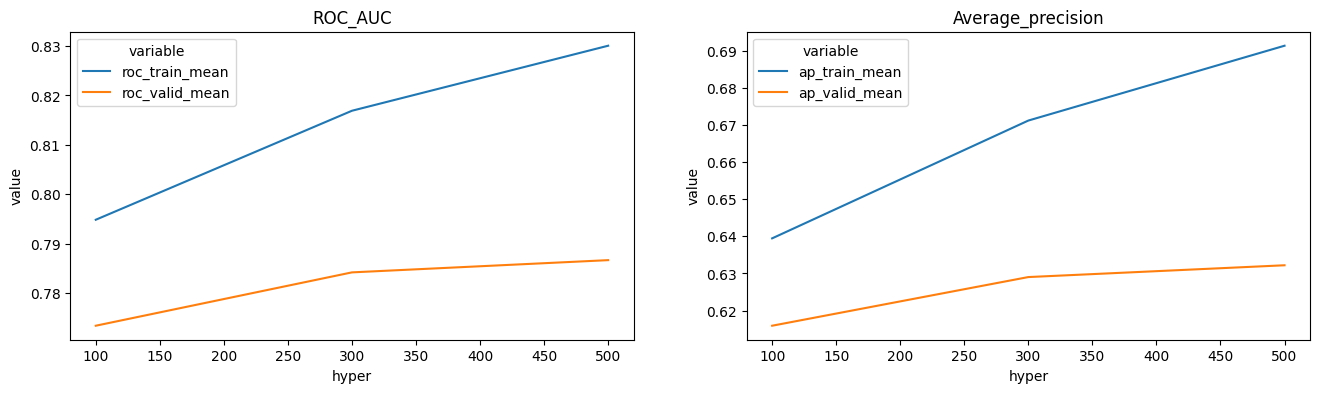

In [58]:
plot_overfit(df_overfit)

##### learning_rate

In [59]:
scoring = {'roc_auc' : 'roc_auc', 
           'average_precision': 'average_precision'}

list_scores = []

for i, xxx in enumerate(np.arange(0.001, 0.1, 0.025)):
    print(f'Parameter : {xxx} ')
    param_grid = {
        'learning_rate': xxx, 
        'num_leaves': 11, 
        'min_child_samples': 900,
        'n_estimators': 300}

    model = LGBMClassifier(random_state = 42, 
                           n_jobs = -1, 
                           objective = 'binary',
                           importance_type = 'gain',
                            **param_grid, verbosity = -1)

    pipe = Pipeline([('prep', pipeline),
                    ('model', model)])
    cv = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 1, random_state = 42)
    scores = cross_validate(pipe, X_train, y_train.values, scoring = scoring, cv = cv, return_train_score = True, n_jobs = -1)
    scores = pd.DataFrame(scores)
    scores['ind_exp'] = 'model_'+str(i)
    scores['hyper'] = xxx
    list_scores.append(scores)

Parameter : 0.001 
Parameter : 0.026000000000000002 
Parameter : 0.051000000000000004 
Parameter : 0.07600000000000001 


In [60]:
df_scores = pd.concat(list_scores)
df_overfit = df_scores[['ind_exp', 'hyper', 'train_roc_auc', 'test_roc_auc', 'train_average_precision', 'test_average_precision']] \
            .groupby(by = ['ind_exp', 'hyper']) \
            .agg(roc_train_mean = ('train_roc_auc', 'mean'), 
                 roc_valid_mean = ('test_roc_auc', 'mean'),
                 ap_train_mean = ('train_average_precision', 'mean'),
                 ap_valid_mean = ('test_average_precision', 'mean')) \
            .reset_index()

df_overfit['roc_dif'] = np.absolute(df_overfit.roc_train_mean - df_overfit.roc_valid_mean)
df_overfit['ap_dif'] = np.absolute(df_overfit.ap_train_mean - df_overfit.ap_valid_mean)

df_overfit['gini_train_mean'] = (2*df_overfit['roc_train_mean'] - 1)
df_overfit['gini_valid_mean'] = (2*df_overfit['roc_valid_mean'] - 1)
df_overfit['gini_dif'] = np.absolute(df_overfit.gini_train_mean - df_overfit.gini_valid_mean)
df_overfit.sort_values(by = 'gini_dif')

,ind_exp,hyper,roc_train_mean,roc_valid_mean,ap_train_mean,ap_valid_mean,roc_dif,ap_dif,gini_train_mean,gini_valid_mean,gini_dif
0,model_0,0.00,0.74,0.72,0.52,0.51,0.02,0.02,0.48,0.44,0.04
1,model_1,0.03,0.81,0.78,0.66,0.63,0.03,0.03,0.61,0.56,0.05
2,model_2,0.05,0.82,0.79,0.68,0.63,0.04,0.05,0.65,0.57,0.07
3,model_3,0.08,0.83,0.79,0.70,0.63,0.05,0.07,0.67,0.57,0.09


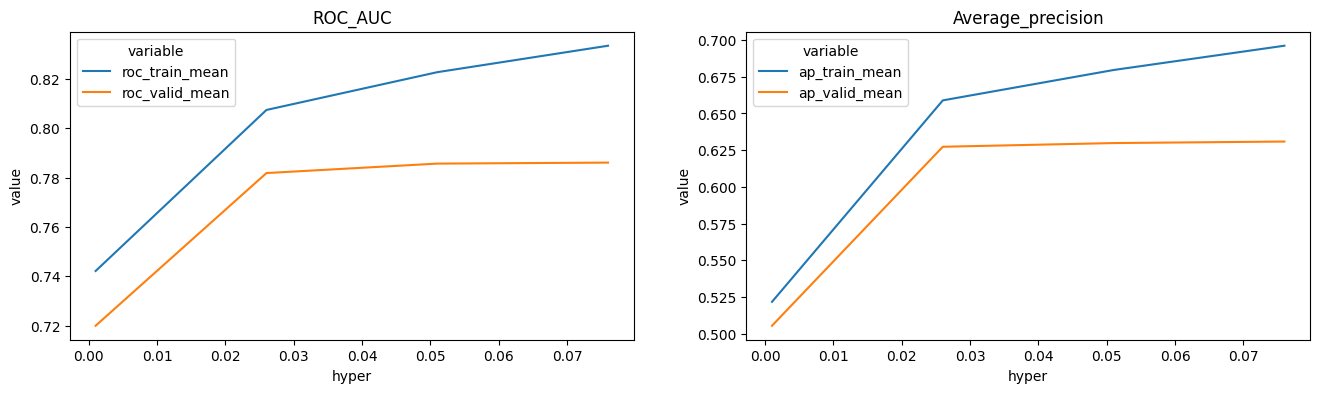

In [61]:
plot_overfit(df_overfit)

##### num_leaves

In [62]:
scoring = {'roc_auc' : 'roc_auc', 
           'average_precision': 'average_precision'}

list_scores = []

for i, xxx in enumerate(np.arange(10, 70, 25)):
    print(f'Parameter : {xxx} ')
    param_grid = {
        'learning_rate': 0.03, 
        'num_leaves': xxx, 
        'min_child_samples': 900,
        'n_estimators': 300}

    model = LGBMClassifier(random_state = 42, 
                           n_jobs = -1, 
                           objective = 'binary',
                           importance_type = 'gain',
                            **param_grid, verbosity = -1)

    pipe = Pipeline([('prep', pipeline),
                    ('model', model)])
    cv = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 1, random_state = 42)
    scores = cross_validate(pipe, X_train, y_train.values, scoring = scoring, cv = cv, return_train_score = True, n_jobs = -1)
    scores = pd.DataFrame(scores)
    scores['ind_exp'] = 'model_'+str(i)
    scores['hyper'] = xxx
    list_scores.append(scores)

Parameter : 10 
Parameter : 35 
Parameter : 60 


In [63]:
df_scores = pd.concat(list_scores)
df_overfit = df_scores[['ind_exp', 'hyper', 'train_roc_auc', 'test_roc_auc', 'train_average_precision', 'test_average_precision']] \
            .groupby(by = ['ind_exp', 'hyper']) \
            .agg(roc_train_mean = ('train_roc_auc', 'mean'), 
                 roc_valid_mean = ('test_roc_auc', 'mean'),
                 ap_train_mean = ('train_average_precision', 'mean'),
                 ap_valid_mean = ('test_average_precision', 'mean')) \
            .reset_index()

df_overfit['roc_dif'] = np.absolute(df_overfit.roc_train_mean - df_overfit.roc_valid_mean)
df_overfit['ap_dif'] = np.absolute(df_overfit.ap_train_mean - df_overfit.ap_valid_mean)

df_overfit['gini_train_mean'] = (2*df_overfit['roc_train_mean'] - 1)
df_overfit['gini_valid_mean'] = (2*df_overfit['roc_valid_mean'] - 1)
df_overfit['gini_dif'] = np.absolute(df_overfit.gini_train_mean - df_overfit.gini_valid_mean)
df_overfit.sort_values(by = 'gini_dif')

,ind_exp,hyper,roc_train_mean,roc_valid_mean,ap_train_mean,ap_valid_mean,roc_dif,ap_dif,gini_train_mean,gini_valid_mean,gini_dif
0,model_0,10,0.81,0.78,0.66,0.63,0.03,0.03,0.62,0.57,0.06
1,model_1,35,0.81,0.78,0.66,0.63,0.03,0.03,0.62,0.57,0.06
2,model_2,60,0.81,0.78,0.66,0.63,0.03,0.03,0.62,0.57,0.06


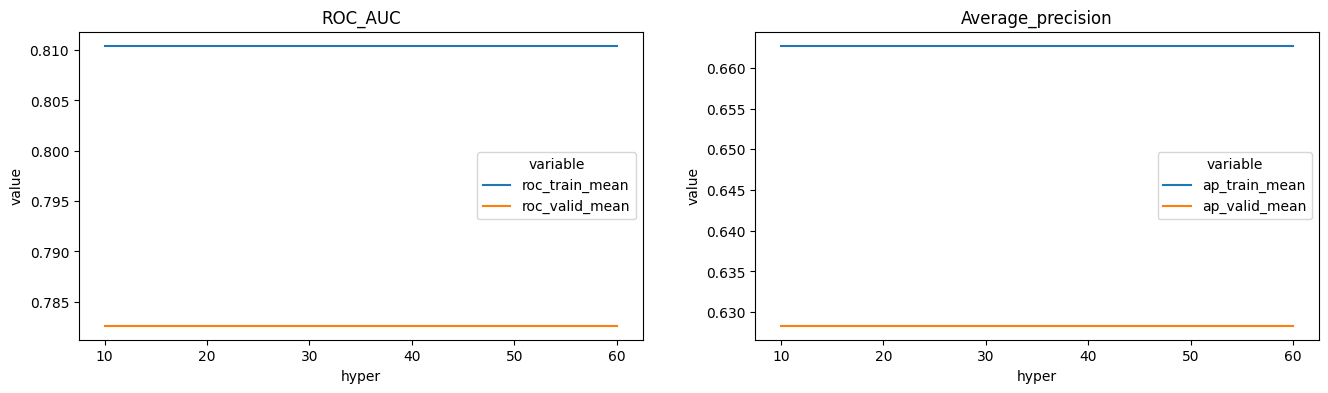

In [64]:
plot_overfit(df_overfit)

##### min_child_samples

In [65]:
scoring = {'roc_auc' : 'roc_auc', 
           'average_precision': 'average_precision'}

list_scores = []

for i, xxx in enumerate(np.arange(50, 201, 40)):
    print(f'Parameter : {xxx} ')
    param_grid = {
        'learning_rate': 0.03, 
        'num_leaves': 10, 
        'min_child_samples': xxx,
        'n_estimators': 300}

    model = LGBMClassifier(random_state = 42, 
                           n_jobs = -1, 
                           objective = 'binary',
                           importance_type = 'gain',
                            **param_grid, verbosity = -1)

    pipe = Pipeline([('prep', pipeline),
                    ('model', model)])
    cv = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 1, random_state = 42)
    scores = cross_validate(pipe, X_train, y_train.values, scoring = scoring, cv = cv, return_train_score = True, n_jobs = -1)
    scores = pd.DataFrame(scores)
    scores['ind_exp'] = 'model_'+str(i)
    scores['hyper'] = xxx
    list_scores.append(scores)

Parameter : 50 
Parameter : 90 
Parameter : 130 
Parameter : 170 


In [66]:
df_scores = pd.concat(list_scores)
df_overfit = df_scores[['ind_exp', 'hyper', 'train_roc_auc', 'test_roc_auc', 'train_average_precision', 'test_average_precision']] \
            .groupby(by = ['ind_exp', 'hyper']) \
            .agg(roc_train_mean = ('train_roc_auc', 'mean'), 
                 roc_valid_mean = ('test_roc_auc', 'mean'),
                 ap_train_mean = ('train_average_precision', 'mean'),
                 ap_valid_mean = ('test_average_precision', 'mean')) \
            .reset_index()

df_overfit['roc_dif'] = np.absolute(df_overfit.roc_train_mean - df_overfit.roc_valid_mean)
df_overfit['ap_dif'] = np.absolute(df_overfit.ap_train_mean - df_overfit.ap_valid_mean)

df_overfit['gini_train_mean'] = (2*df_overfit['roc_train_mean'] - 1)
df_overfit['gini_valid_mean'] = (2*df_overfit['roc_valid_mean'] - 1)
df_overfit['gini_dif'] = np.absolute(df_overfit.gini_train_mean - df_overfit.gini_valid_mean)
df_overfit.sort_values(by = 'gini_dif')

,ind_exp,hyper,roc_train_mean,roc_valid_mean,ap_train_mean,ap_valid_mean,roc_dif,ap_dif,gini_train_mean,gini_valid_mean,gini_dif
3,model_3,170,0.87,0.79,0.75,0.64,0.08,0.11,0.75,0.58,0.16
2,model_2,130,0.88,0.79,0.76,0.64,0.09,0.12,0.76,0.59,0.17
1,model_1,90,0.88,0.79,0.76,0.64,0.09,0.12,0.76,0.59,0.18
0,model_0,50,0.89,0.79,0.77,0.64,0.09,0.13,0.77,0.58,0.19


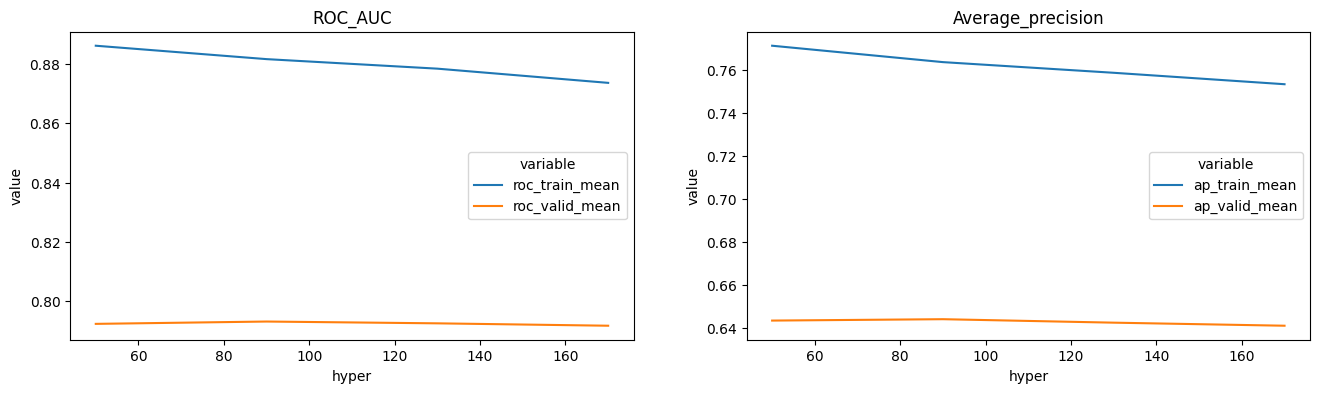

In [67]:
plot_overfit(df_overfit)

#### Model creation

In [160]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, average_precision_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

> Com o hypertunning finalizado, podemos começar a criar o modelo final

In [161]:
model = LGBMClassifier(random_state = 42, 
                      n_jobs = -1, 
                      objective = 'binary',
                      importance_type = 'gain',
                      learning_rate = 0.03,
                      num_leaves = 10,
                      min_child_samples =  170,
                      n_estimators = 300,
                       class_weight = 'balanced',
                      verbosity = -1)

In [162]:
model.fit(pipeline.transform(X_train), y_train)

LGBMClassifier(class_weight='balanced', importance_type='gain',
               learning_rate=0.03, min_child_samples=170, n_estimators=300,
               n_jobs=-1, num_leaves=10, objective='binary', random_state=42,
               verbosity=-1)

In [163]:
y_test_score = model.predict_proba(pipeline.transform(X_test))[:,1]
y_train_score = model.predict_proba(pipeline.transform(X_train))[:,1]

In [72]:
def gini_score(y_true, y_pred_proba):
    return (2*roc_auc_score(y_true, y_pred_proba)) - 1

In [73]:
def plot_graph2(train, valid, y_train, pred_proba_train, y_valid, pred_proba_valid):
    warnings.filterwarnings('ignore')
    fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (16,16))
    plt.subplots_adjust(left = None, bottom = None, right = None, top = None, wspace = 0.2, hspace = 0.4)

    # train
    precision, recall, thresholds = precision_recall_curve(y_train, pred_proba_train)
    p_auc = average_precision_score(y_train, pred_proba_train)
    default = y_train.mean()
    fpr, tpr, thresholds = roc_curve(y_train, pred_proba_train)
    gini = gini_score(y_train, pred_proba_train)
    auc = roc_auc_score(y_train, pred_proba_train)
    #top_p = precison_k_score(y_train, pred_proba_train)

    axs[0,0].plot(fpr, tpr, label = "AUC:%.2f GINI:%2f" % (auc, gini), linewidth = 2, c = '#BFE1FF')
    axs[0,0].plot([0,1], [0,1], linestyle = '--', label = 'No Skill', c = '#FF6D07')
    axs[0,0].set_xlabel('False Positive Rate')
    axs[0,0].set_ylabel('True Positive Rate (recall)')
    axs[0,0].legend(loc = 0)
    axs[0,0].set_title(train+':Roc Curve');

    axs[1,0].plot(recall, precision, label = "PR-AUC:%3f" % (p_auc), linewidth = 2, c = '#BFE1FF')
    axs[1,0].hlines(default, 0.0, 1.0, linestyle = 'dashed', label = 'No Skill', colors = ['#FF6D07'])
    axs[1,0].set_xlabel('Recall')
    axs[1,0].set_ylabel('Precision')
    axs[1,0].legend(loc = 0)
    axs[1,0].set_title(train+': PR Curve');

    vis = pd.DataFrame()
    vis['target'] = y_train
    vis['proba'] = pred_proba_train
    list_1 = vis[vis.target == 1].proba
    list_2 = vis[vis.target == 0].proba

    sns.distplot(list_1, kde = True, ax = axs[2,0], hist = True, bins = 10)
    sns.distplot(list_2, kde = True, ax = axs[2,0], hist = True, bins = 10)
    axs[2,0].set_title(train+':Threshold Curve')

    # testc
    precision, recall, thresholds = precision_recall_curve(y_valid, pred_proba_valid)
    p_auc = average_precision_score(y_valid, pred_proba_valid)
    default = y_valid.mean()
    fpr, tpr, thresholds = roc_curve(y_valid, pred_proba_valid)
    gini = gini_score(y_valid, pred_proba_valid)
    auc = roc_auc_score(y_valid, pred_proba_valid)
    #precison_k_scoretop_p = precison_k_score(y_train, pred_proba_valid)

    axs[0,1].plot(fpr, tpr, label = "AUC:%.2f GINI:%2f" % (auc, gini), linewidth = 2, c = '#BFE1FF')
    axs[0,1].plot([0,1], [0,1], linestyle = '--', label = 'No Skill', c = '#FF6D07')
    axs[0,1].set_xlabel('False Positive Rate')
    axs[0,1].set_ylabel('True Positive Rate (recall)')
    axs[0,1].legend(loc = 0)
    axs[0,1].set_title(valid+':Roc Curve');

    axs[1,1].plot(recall, precision, label = "PR-AUC:%3f" % (p_auc), linewidth = 2, c = '#BFE1FF')
    axs[1,1].hlines(default, 0.0, 1.0, linestyle = 'dashed', label = 'No Skill', colors = ['#FF6D07'])
    axs[1,1].set_xlabel('Recall')
    axs[1,1].set_ylabel('Precision')
    axs[1,1].legend(loc = 0)
    axs[1,1].set_title(valid+': PR Curve');

    vis = pd.DataFrame()
    vis['target'] = y_valid
    vis['proba'] = pred_proba_valid
    list_1 = vis[vis.target == 1].proba
    list_2 = vis[vis.target == 0].proba

    sns.distplot(list_1, kde = True, ax = axs[2,1], hist = True, bins = 10)
    sns.distplot(list_2, kde = True, ax = axs[2,1], hist = True, bins = 10)
    axs[2,1].set_title(valid+':Threshold Curve')
    return plt.show()

> Como está as métricas na base de treino e teste?

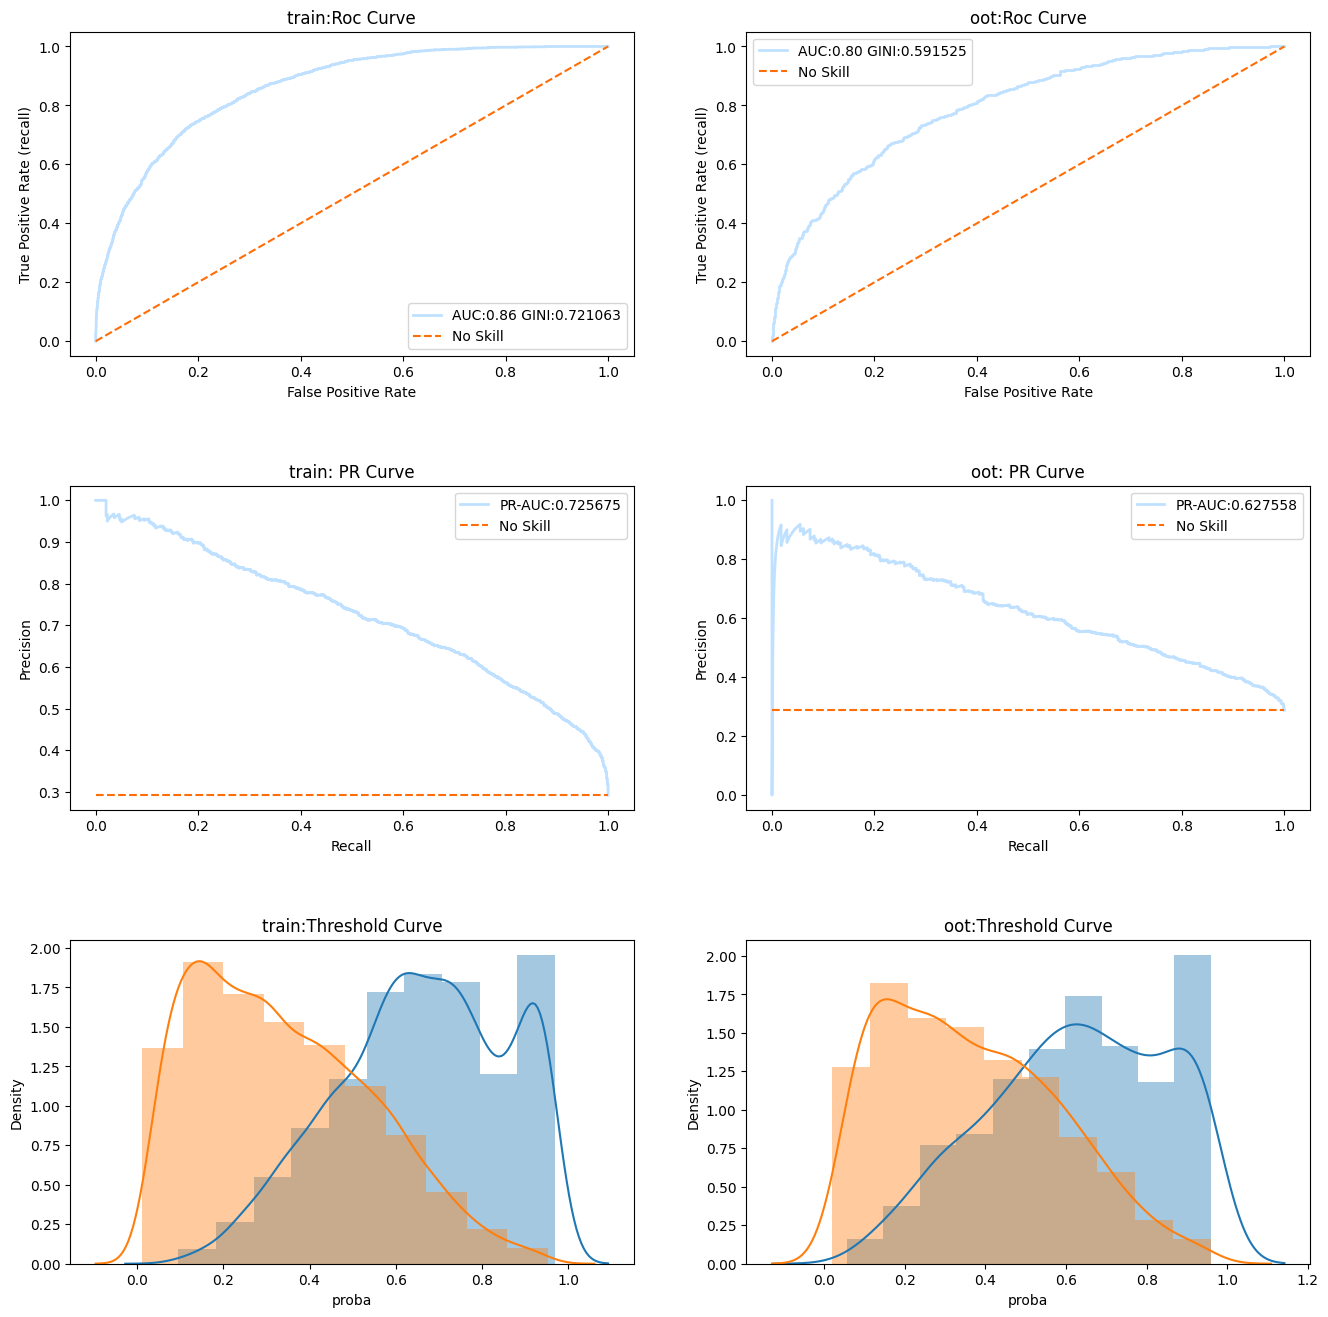

In [164]:
plot_graph2('train', 'oot', y_train, y_train_score, y_test, y_test_score)

> Podemos ver que o modelo conseguiu captar bem o comportamento da target 0 e 1. Apesar de ainda haver uma zona de confusão, ao redor do score 0.5.

Podemos ver também, que o modelo não ficou tão overfitado. 

### Regressão Logística

#### Pressuposto da multicolinearidade

In [76]:
X_train_transformed = pipeline.fit_transform(X_train)

X_test_transformed = pipeline.transform(X_test)

In [77]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=X_test.columns)

In [78]:
X_train_transformed.shape

(8590, 62)

In [79]:
corr_matrix = X_train_transformed.corr()

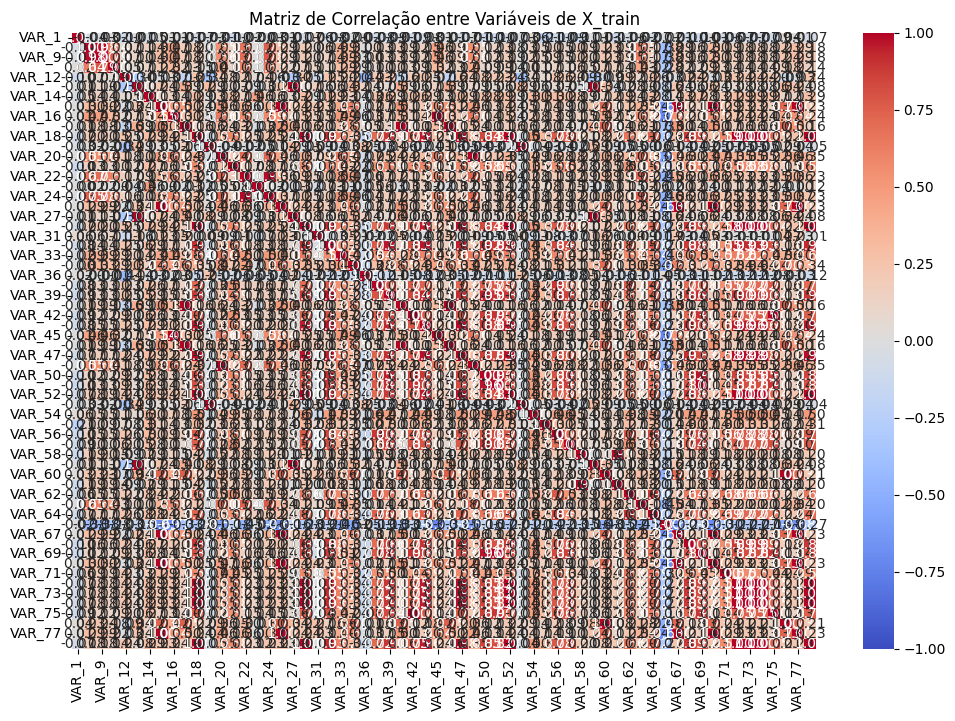

In [80]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre Variáveis de X_train')
plt.show()

In [81]:
corr_threshold = 0.8
corr_filtradas = {}
vars_fora = [] 

for col in X_train.columns:
    
    alta_corr_lista = corr_matrix.index[abs(corr_matrix[col]) > corr_threshold].tolist()
    
    #alta_corr_lista.remove(col)

    if len(alta_corr_lista) > 0:
        corr_filtradas[col] = alta_corr_lista

In [82]:
vars_escolhidas = {}

for var, corr_vars in corr_filtradas.items():
    melhor_corr = None
    melhor_var = None
    for corr_var in corr_vars:
        corr_com_target = X_train[corr_var].corr(y_train)
        
        if melhor_corr is None or abs(corr_com_target) > abs(melhor_corr):
            melhor_corr = corr_com_target
            melhor_var = corr_var
    
    vars_escolhidas[var] = melhor_var

    for corr_var in corr_vars:
        if corr_var != melhor_var:
            vars_fora.append(corr_var)

In [83]:
print("\nVariáveis com maior correlação com a target para cada variável de alta correlação:")
for var, best_var in vars_escolhidas.items():
    print(f"{var}: {best_var}")


Variáveis com maior correlação com a target para cada variável de alta correlação:
VAR_1: VAR_1
VAR_5: VAR_9
VAR_9: VAR_9
VAR_10: VAR_10
VAR_12: VAR_12
VAR_13: VAR_27
VAR_14: VAR_14
VAR_15: VAR_26
VAR_16: VAR_16
VAR_17: VAR_46
VAR_18: VAR_32
VAR_19: VAR_19
VAR_20: VAR_20
VAR_21: VAR_21
VAR_22: VAR_22
VAR_23: VAR_23
VAR_24: VAR_22
VAR_26: VAR_26
VAR_27: VAR_27
VAR_29: VAR_32
VAR_31: VAR_31
VAR_32: VAR_32
VAR_33: VAR_33
VAR_35: VAR_35
VAR_36: VAR_36
VAR_37: VAR_37
VAR_39: VAR_32
VAR_41: VAR_46
VAR_42: VAR_32
VAR_43: VAR_32
VAR_45: VAR_16
VAR_46: VAR_46
VAR_47: VAR_32
VAR_48: VAR_20
VAR_50: VAR_32
VAR_51: VAR_32
VAR_52: VAR_32
VAR_53: VAR_19
VAR_54: VAR_54
VAR_55: VAR_55
VAR_56: VAR_32
VAR_57: VAR_32
VAR_58: VAR_61
VAR_59: VAR_27
VAR_60: VAR_60
VAR_61: VAR_61
VAR_62: VAR_64
VAR_63: VAR_63
VAR_64: VAR_64
VAR_66: VAR_66
VAR_67: VAR_26
VAR_68: VAR_32
VAR_69: VAR_32
VAR_70: VAR_26
VAR_71: VAR_71
VAR_72: VAR_32
VAR_73: VAR_32
VAR_74: VAR_32
VAR_75: VAR_32
VAR_76: VAR_60
VAR_77: VAR_26
VAR_78:

In [84]:
vars_in = list(set(list(vars_escolhidas.values())))

In [85]:
vars_fora = list(set(vars_fora))
vars_fora = list(set(vars_fora) - set(vars_in))

Novo split, retirando as variáveis com multicolinearidade

In [86]:
X = base.drop(columns = ['y', 'safra', 'id'] + vars_fora)  
y = base['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
lista_explicativas = [col for col in X_train.columns if 'VAR' in col]

In [96]:
cols_media = ['VAR_1', 'VAR_19', 'VAR_22', 'VAR_33']  
cols_fillna = [col for col in lista_explicativas if col not in cols_media]  

In [97]:
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('imputer_media', SimpleImputer(strategy='mean'), cols_media),
            ('imputer_fillna', SimpleImputer(strategy='constant', fill_value=-1), cols_fillna)
        ]))
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('imputer_media',
                                                  SimpleImputer(),
                                                  ['VAR_1', 'VAR_19', 'VAR_22',
                                                   'VAR_33']),
                                                 ('imputer_fillna',
                                                  SimpleImputer(fill_value=-1,
                                                                strategy='constant'),
                                                  ['VAR_9', 'VAR_10', 'VAR_12',
                                                   'VAR_14', 'VAR_16', 'VAR_20',
                                                   'VAR_21', 'VAR_23', 'VAR_26',
                                                   'VAR_27', 'VAR_31', 'VAR_32',
                                                   'VAR_35', 'VAR_36', 'VAR_37',
                                                   'VAR_46', 'VAR_54', 'VAR_55',
                                                   'VAR_60', 'VAR_61', 'VAR_63',
                                                   'VAR_64', 'VAR_66',
                                                   'VAR_71'])]))])

In [98]:
X_train_transformed = pipeline.fit_transform(X_train)

X_test_transformed = pipeline.transform(X_test)

In [99]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=X_test.columns)

#### Model creation

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
logreg = LogisticRegression(class_weight = 'balanced')

logreg.fit(X_train_transformed, y_train)

LogisticRegression(class_weight='balanced')

In [104]:
y_test_score = logreg.predict_proba(pipeline.transform(X_test))[:,1]
y_train_score = logreg.predict_proba(pipeline.transform(X_train))[:,1]

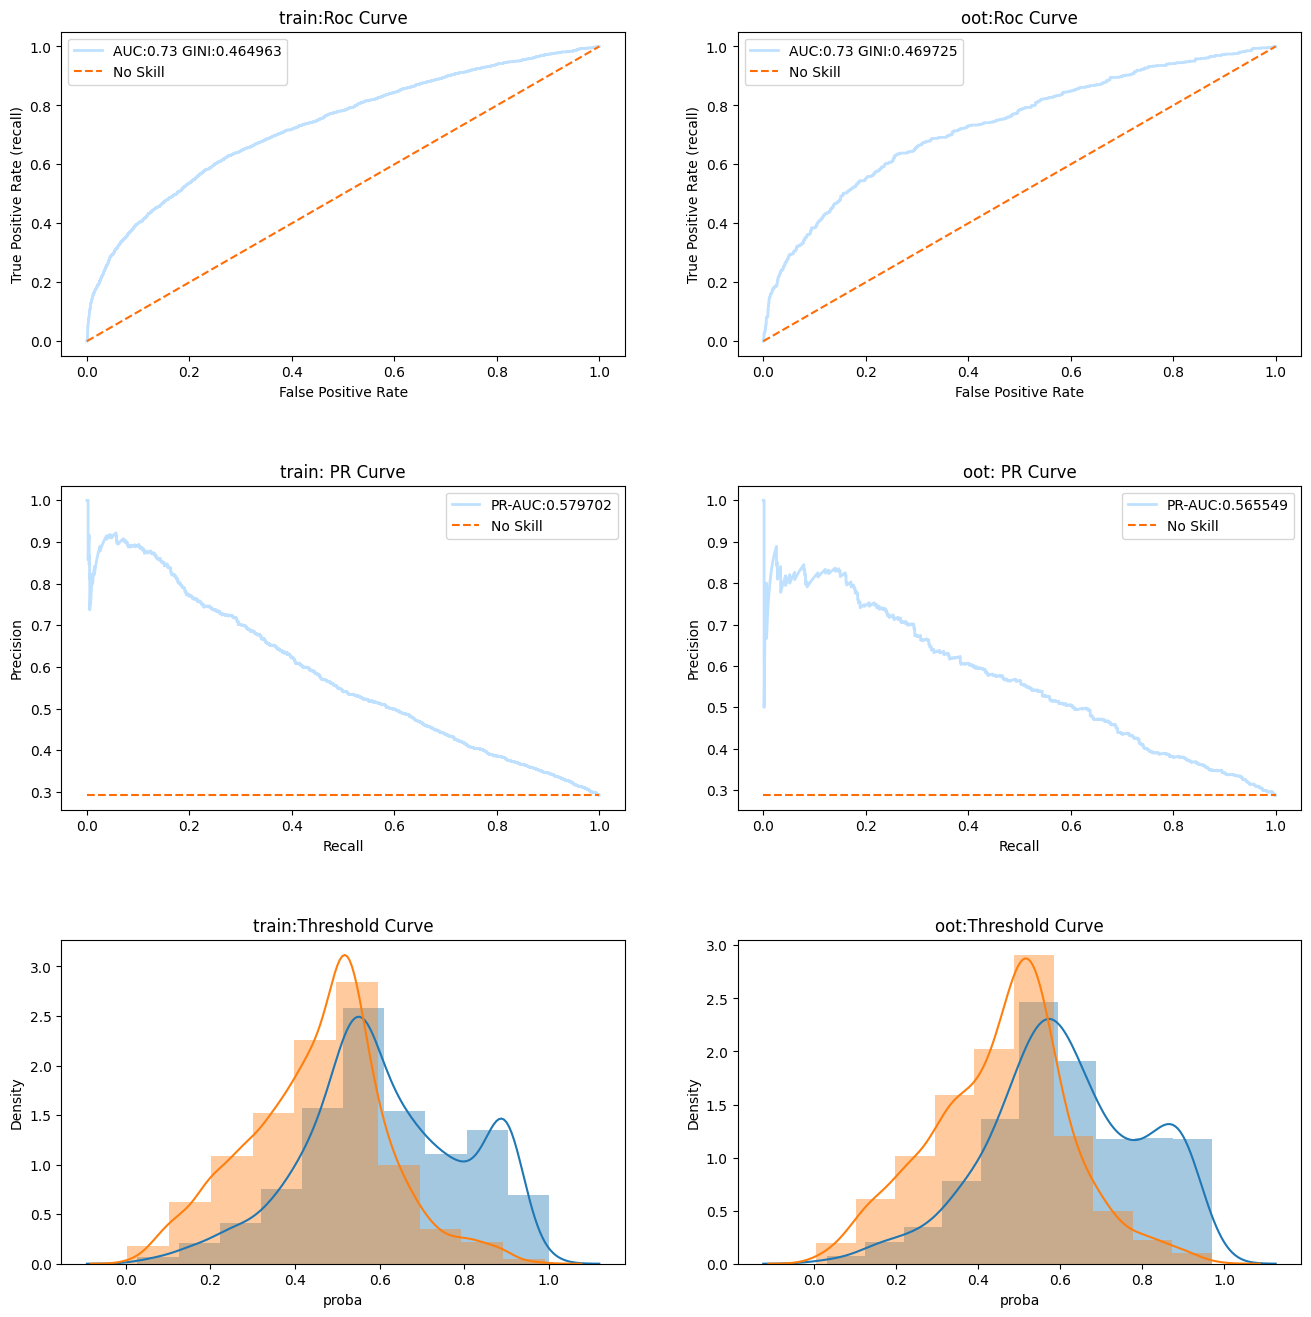

In [105]:
plot_graph2('train', 'oot', y_train, y_train_score, y_test, y_test_score)

> O modelo ficou pior que o modelo feito pelo lightgbm

### Árvore de decisão

In [108]:
X_train_transformed = pipeline.fit_transform(X_train)

X_test_transformed = pipeline.transform(X_test)

In [109]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=X_test.columns)

#### Hypertunning

In [111]:
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, train_test_split, validation_curve
from sklearn.model_selection import learning_curve

In [112]:
import lightgbm as lgb

In [113]:
from lightgbm import LGBMClassifier

In [114]:
from sklearn.tree import DecisionTreeClassifier

##### max_depth

In [117]:
scoring = {'roc_auc' : 'roc_auc', 
           'average_precision': 'average_precision'}

list_scores = []

for i, xxx in enumerate(np.arange(5, 25, 7)):
    print(f'Parameter : {xxx} ')
    param_grid = {
        'max_depth': xxx, 
        'min_samples_split': 20, 
        'min_samples_leaf': 100}

    dtree = DecisionTreeClassifier(random_state = 42, 
                           class_weight='balanced',
                            **param_grid)

    pipe = Pipeline([('prep', pipeline),
                    ('model', dtree)])
    cv = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 1, random_state = 42)
    scores = cross_validate(pipe, X_train, y_train.values, scoring = scoring, cv = cv, return_train_score = True, n_jobs = -1)
    scores = pd.DataFrame(scores)
    scores['ind_exp'] = 'model_'+str(i)
    scores['hyper'] = xxx
    list_scores.append(scores)

Parameter : 5 
Parameter : 12 
Parameter : 19 


In [118]:
df_scores = pd.concat(list_scores)
df_overfit = df_scores[['ind_exp', 'hyper', 'train_roc_auc', 'test_roc_auc', 'train_average_precision', 'test_average_precision']] \
            .groupby(by = ['ind_exp', 'hyper']) \
            .agg(roc_train_mean = ('train_roc_auc', 'mean'), 
                 roc_valid_mean = ('test_roc_auc', 'mean'),
                 ap_train_mean = ('train_average_precision', 'mean'),
                 ap_valid_mean = ('test_average_precision', 'mean')) \
            .reset_index()

df_overfit['roc_dif'] = np.absolute(df_overfit.roc_train_mean - df_overfit.roc_valid_mean)
df_overfit['ap_dif'] = np.absolute(df_overfit.ap_train_mean - df_overfit.ap_valid_mean)

df_overfit['gini_train_mean'] = (2*df_overfit['roc_train_mean'] - 1)
df_overfit['gini_valid_mean'] = (2*df_overfit['roc_valid_mean'] - 1)
df_overfit['gini_dif'] = np.absolute(df_overfit.gini_train_mean - df_overfit.gini_valid_mean)
df_overfit.sort_values(by = 'gini_dif')

,ind_exp,hyper,roc_train_mean,roc_valid_mean,ap_train_mean,ap_valid_mean,roc_dif,ap_dif,gini_train_mean,gini_valid_mean,gini_dif
0,model_0,5,0.76,0.73,0.59,0.55,0.03,0.03,0.52,0.45,0.07
1,model_1,12,0.79,0.73,0.62,0.57,0.06,0.06,0.57,0.46,0.11
2,model_2,19,0.79,0.73,0.62,0.57,0.06,0.06,0.57,0.46,0.11


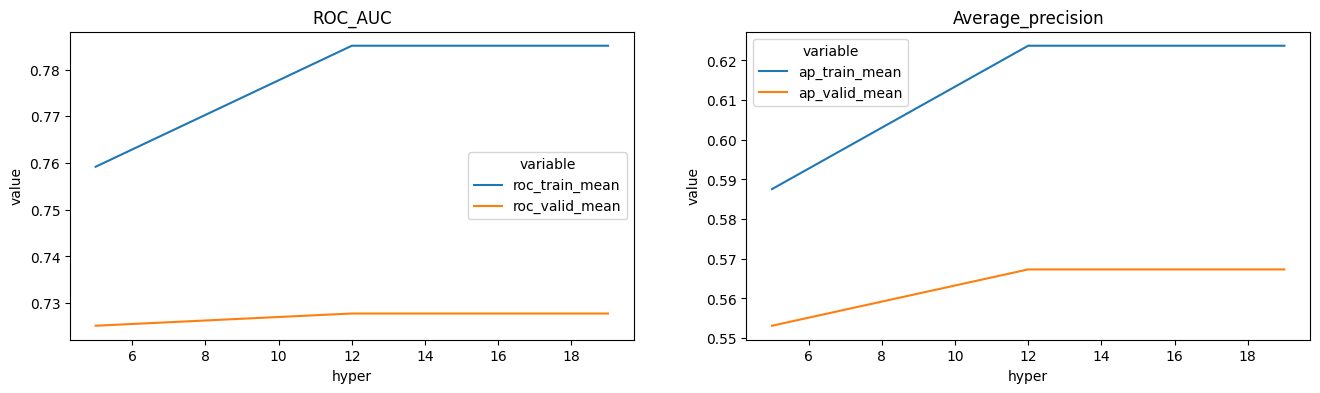

In [119]:
plot_overfit(df_overfit)

##### min_samples_split

In [133]:
scoring = {'roc_auc' : 'roc_auc', 
           'average_precision': 'average_precision'}

list_scores = []

for i, xxx in enumerate(np.arange(20, 2000, 100)):
    print(f'Parameter : {xxx} ')
    param_grid = {
        'max_depth': 5, 
        'min_samples_split': xxx, 
        'min_samples_leaf': 100}

    dtree = DecisionTreeClassifier(random_state = 42, 
                           class_weight='balanced',
                            **param_grid)

    pipe = Pipeline([('prep', pipeline),
                    ('model', dtree)])
    cv = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 1, random_state = 42)
    scores = cross_validate(pipe, X_train, y_train.values, scoring = scoring, cv = cv, return_train_score = True, n_jobs = -1)
    scores = pd.DataFrame(scores)
    scores['ind_exp'] = 'model_'+str(i)
    scores['hyper'] = xxx
    list_scores.append(scores)

Parameter : 20 
Parameter : 120 
Parameter : 220 
Parameter : 320 
Parameter : 420 
Parameter : 520 
Parameter : 620 
Parameter : 720 
Parameter : 820 
Parameter : 920 
Parameter : 1020 
Parameter : 1120 
Parameter : 1220 
Parameter : 1320 
Parameter : 1420 
Parameter : 1520 
Parameter : 1620 
Parameter : 1720 
Parameter : 1820 
Parameter : 1920 


In [134]:
df_scores = pd.concat(list_scores)
df_overfit = df_scores[['ind_exp', 'hyper', 'train_roc_auc', 'test_roc_auc', 'train_average_precision', 'test_average_precision']] \
            .groupby(by = ['ind_exp', 'hyper']) \
            .agg(roc_train_mean = ('train_roc_auc', 'mean'), 
                 roc_valid_mean = ('test_roc_auc', 'mean'),
                 ap_train_mean = ('train_average_precision', 'mean'),
                 ap_valid_mean = ('test_average_precision', 'mean')) \
            .reset_index()

df_overfit['roc_dif'] = np.absolute(df_overfit.roc_train_mean - df_overfit.roc_valid_mean)
df_overfit['ap_dif'] = np.absolute(df_overfit.ap_train_mean - df_overfit.ap_valid_mean)

df_overfit['gini_train_mean'] = (2*df_overfit['roc_train_mean'] - 1)
df_overfit['gini_valid_mean'] = (2*df_overfit['roc_valid_mean'] - 1)
df_overfit['gini_dif'] = np.absolute(df_overfit.gini_train_mean - df_overfit.gini_valid_mean)
df_overfit.sort_values(by = 'gini_dif')

,ind_exp,hyper,roc_train_mean,roc_valid_mean,ap_train_mean,ap_valid_mean,roc_dif,ap_dif,gini_train_mean,gini_valid_mean,gini_dif
6,model_14,1420,0.72,0.70,0.48,0.46,0.02,0.02,0.44,0.41,0.04
7,model_15,1520,0.72,0.70,0.48,0.46,0.02,0.02,0.44,0.41,0.04
10,model_18,1820,0.71,0.69,0.46,0.45,0.02,0.02,0.42,0.39,0.04
9,model_17,1720,0.71,0.69,0.46,0.45,0.02,0.02,0.42,0.39,0.04
11,model_19,1920,0.71,0.69,0.46,0.45,0.02,0.02,0.42,0.39,0.04
5,model_13,1320,0.72,0.70,0.48,0.46,0.02,0.02,0.44,0.41,0.04
8,model_16,1620,0.71,0.69,0.47,0.45,0.02,0.02,0.43,0.39,0.04
3,model_11,1120,0.73,0.71,0.50,0.49,0.02,0.01,0.46,0.42,0.05
4,model_12,1220,0.73,0.71,0.50,0.49,0.02,0.01,0.46,0.42,0.05
2,model_10,1020,0.73,0.71,0.50,0.49,0.02,0.01,0.47,0.42,0.05


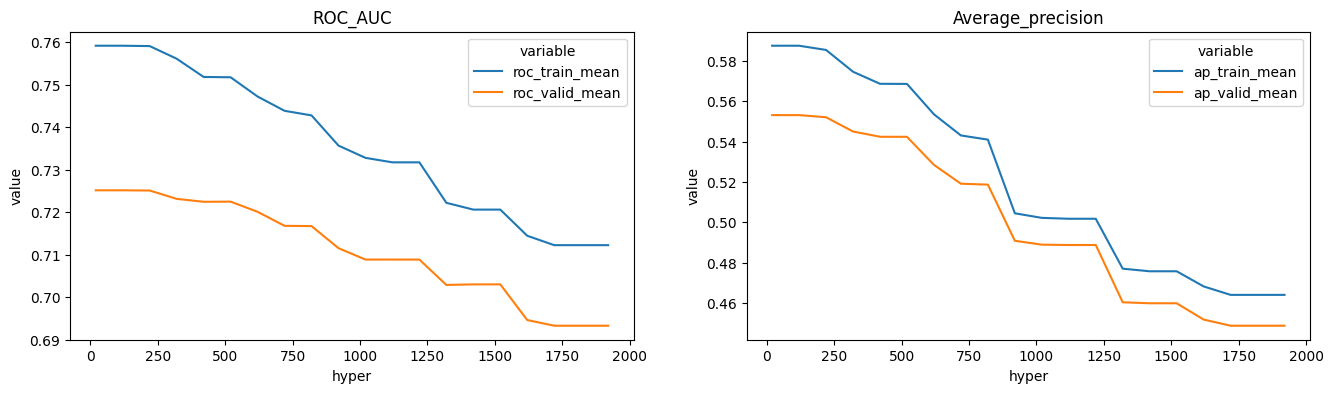

In [135]:
plot_overfit(df_overfit)

##### min_samples_leaf

In [130]:
scoring = {'roc_auc' : 'roc_auc', 
           'average_precision': 'average_precision'}

list_scores = []

for i, xxx in enumerate(np.arange(50, 400, 50)):
    print(f'Parameter : {xxx} ')
    param_grid = {
        'max_depth': 5, 
        'min_samples_split': 20, 
        'min_samples_leaf': xxx}

    dtree = DecisionTreeClassifier(random_state = 42, 
                           class_weight='balanced',
                            **param_grid)

    pipe = Pipeline([('prep', pipeline),
                    ('model', dtree)])
    cv = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 1, random_state = 42)
    scores = cross_validate(pipe, X_train, y_train.values, scoring = scoring, cv = cv, return_train_score = True, n_jobs = -1)
    scores = pd.DataFrame(scores)
    scores['ind_exp'] = 'model_'+str(i)
    scores['hyper'] = xxx
    list_scores.append(scores)

Parameter : 50 
Parameter : 100 
Parameter : 150 
Parameter : 200 
Parameter : 250 
Parameter : 300 
Parameter : 350 


In [131]:
df_scores = pd.concat(list_scores)
df_overfit = df_scores[['ind_exp', 'hyper', 'train_roc_auc', 'test_roc_auc', 'train_average_precision', 'test_average_precision']] \
            .groupby(by = ['ind_exp', 'hyper']) \
            .agg(roc_train_mean = ('train_roc_auc', 'mean'), 
                 roc_valid_mean = ('test_roc_auc', 'mean'),
                 ap_train_mean = ('train_average_precision', 'mean'),
                 ap_valid_mean = ('test_average_precision', 'mean')) \
            .reset_index()

df_overfit['roc_dif'] = np.absolute(df_overfit.roc_train_mean - df_overfit.roc_valid_mean)
df_overfit['ap_dif'] = np.absolute(df_overfit.ap_train_mean - df_overfit.ap_valid_mean)

df_overfit['gini_train_mean'] = (2*df_overfit['roc_train_mean'] - 1)
df_overfit['gini_valid_mean'] = (2*df_overfit['roc_valid_mean'] - 1)
df_overfit['gini_dif'] = np.absolute(df_overfit.gini_train_mean - df_overfit.gini_valid_mean)
df_overfit.sort_values(by = 'gini_dif')

,ind_exp,hyper,roc_train_mean,roc_valid_mean,ap_train_mean,ap_valid_mean,roc_dif,ap_dif,gini_train_mean,gini_valid_mean,gini_dif
5,model_5,300,0.75,0.72,0.55,0.53,0.03,0.02,0.49,0.44,0.05
6,model_6,350,0.74,0.72,0.54,0.52,0.03,0.02,0.49,0.43,0.05
4,model_4,250,0.75,0.72,0.57,0.54,0.03,0.02,0.50,0.45,0.05
3,model_3,200,0.75,0.72,0.57,0.54,0.03,0.02,0.50,0.45,0.05
2,model_2,150,0.75,0.72,0.58,0.55,0.03,0.03,0.51,0.45,0.06
1,model_1,100,0.76,0.73,0.59,0.55,0.03,0.03,0.52,0.45,0.07
0,model_0,50,0.76,0.72,0.59,0.55,0.04,0.04,0.53,0.45,0.08


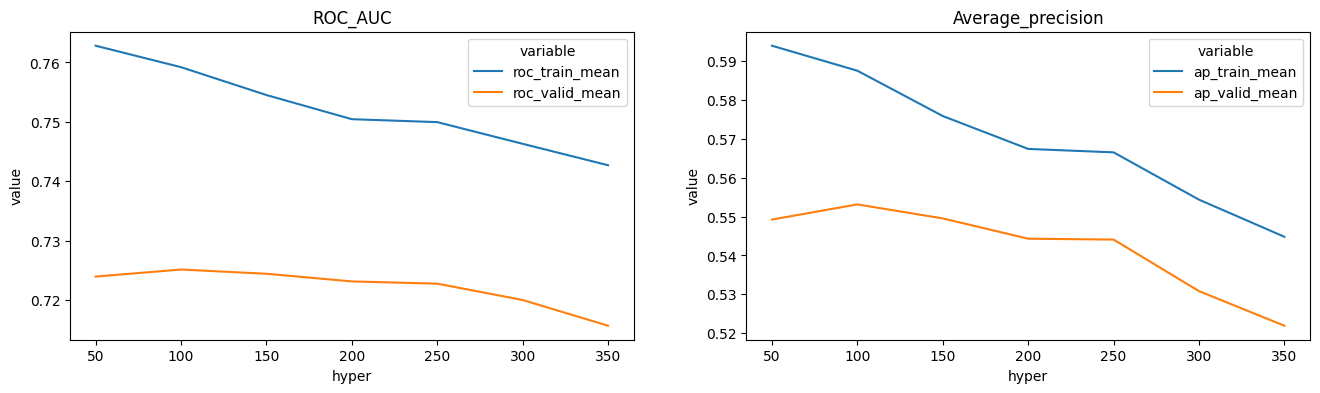

In [132]:
plot_overfit(df_overfit)

#### Model creation

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, average_precision_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

> Com o hypertunning finalizado, podemos começar a criar o modelo final

In [136]:
dtree = DecisionTreeClassifier(random_state = 42, 
                           class_weight='balanced',
                            max_depth = 5,
                              min_samples_split = 20, 
                              min_samples_leaf = 100)

In [137]:
dtree.fit(pipeline.transform(X_train), y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=100, min_samples_split=20,
                       random_state=42)

In [139]:
y_test_score = dtree.predict_proba(pipeline.transform(X_test))[:,1]
y_train_score = dtree.predict_proba(pipeline.transform(X_train))[:,1]

> Como está as métricas na base de treino e teste?

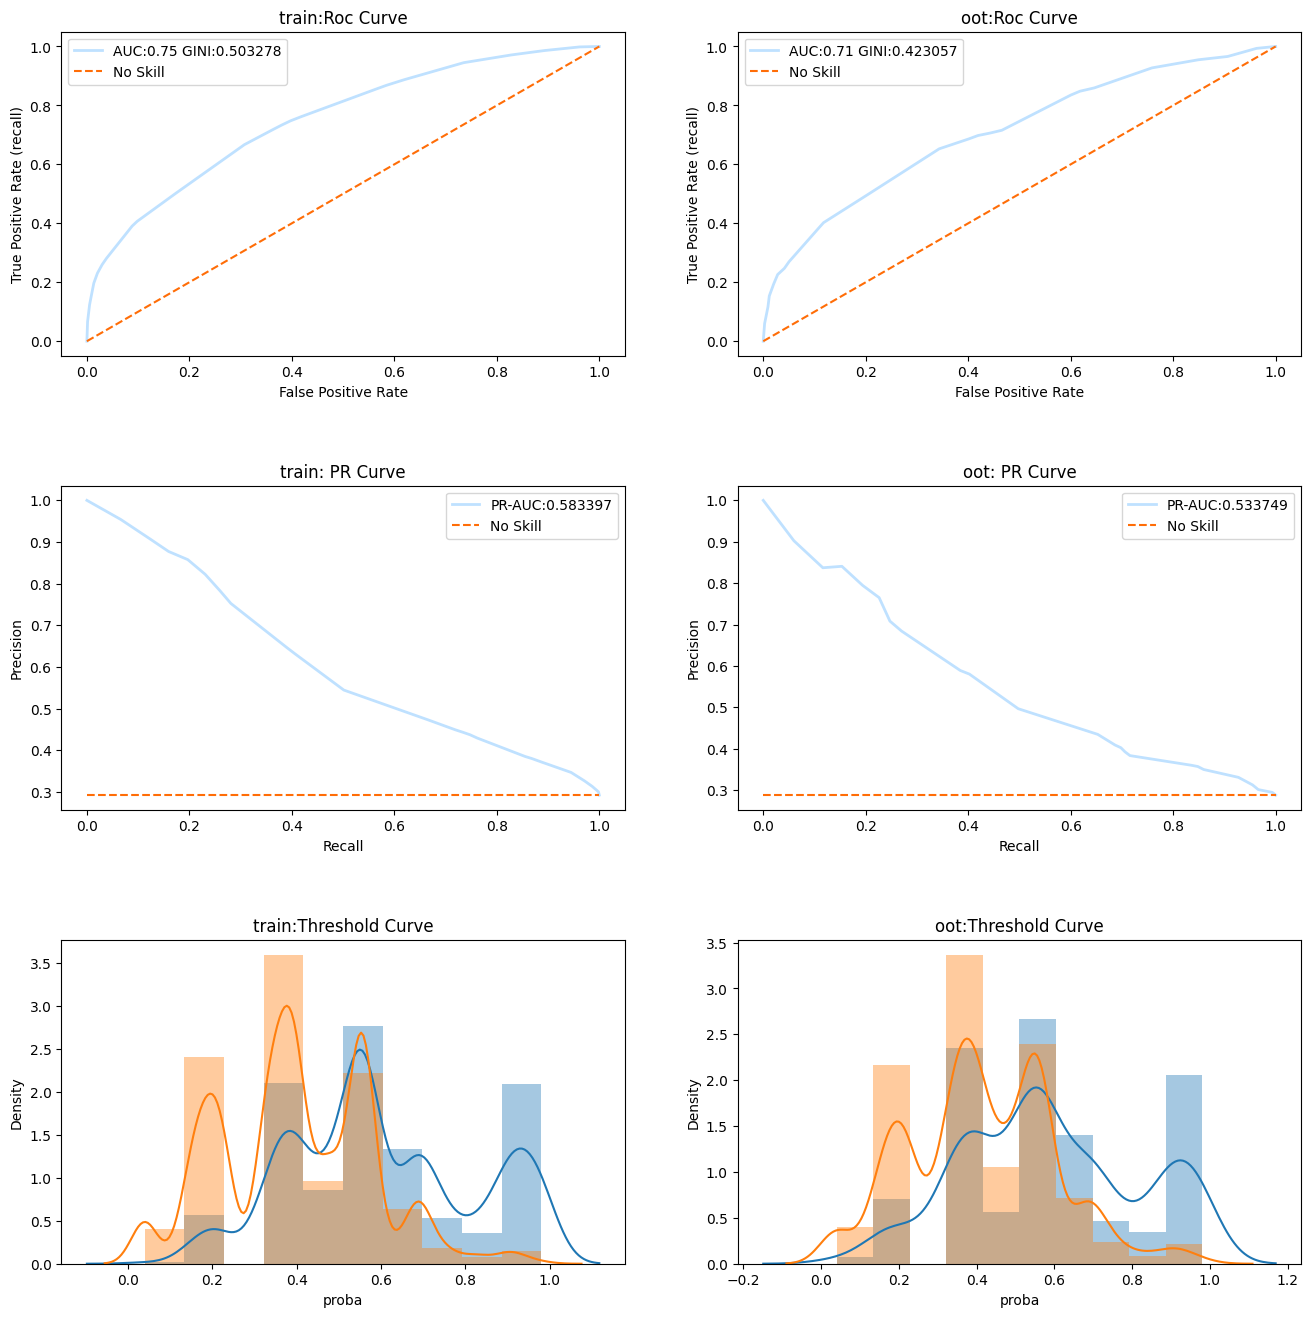

In [140]:
plot_graph2('train', 'oot', y_train, y_train_score, y_test, y_test_score)

> Podemos ver que o modelo também não conseguiu ficar tão bom quanto o modelo feito pelo lightgbm.

## Avaliação do modelo criado

### Feature importance

In [165]:
X_train_transformed = pd.DataFrame(pipeline.transform(X_train), columns=X_train.columns)
X_test_transformed = pd.DataFrame(pipeline.transform(X_test), columns=X_test.columns)

In [167]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, X_train_transformed.head(1).columns)),
                           columns = ['Value', 'Feature'])
feature_imp['valor'] = feature_imp['Value']/feature_imp['Value'].sum()

In [184]:
feature_imp.shape

(62, 3)

In [168]:
feature_imp['valor'] = feature_imp['valor']*100
feature_imp.sort_values(by = 'valor', ascending = False).sort_values(by = 'valor', ascending = False)

,Value,Feature,valor
61,17796.10,VAR_1,28.30
60,5431.71,VAR_14,8.64
59,4924.96,VAR_21,7.83
58,4861.71,VAR_23,7.73
57,4778.77,VAR_31,7.60
56,3454.90,VAR_54,5.49
55,2681.61,VAR_58,4.26
54,1563.71,VAR_20,2.49
53,1208.59,VAR_22,1.92
52,1141.84,VAR_35,1.82


### Construção do GH

In [169]:
from optbinning import OptimalBinning

In [170]:
x = y_train_score
y = y_train

In [174]:
optb = OptimalBinning(name = 'y_hat', dtype = 'numerical', solver = 'cp', min_n_bins = 13)
optb.fit(x, y)
binning_table = optb.binning_table
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.15)",1347,0.16,1340,7,0.01,4.37,0.95,0.07
1,"[0.15, 0.22)",724,0.08,703,21,0.03,2.63,0.28,0.03
2,"[0.22, 0.31)",1127,0.13,1036,91,0.08,1.55,0.21,0.02
3,"[0.31, 0.36)",491,0.06,410,81,0.16,0.74,0.03,0.00
4,"[0.36, 0.42)",638,0.07,521,117,0.18,0.61,0.02,0.00
5,"[0.42, 0.46)",506,0.06,378,128,0.25,0.20,0.00,0.00
6,"[0.46, 0.51)",438,0.05,312,126,0.29,0.02,0.00,0.00
7,"[0.51, 0.55)",453,0.05,319,134,0.30,-0.02,0.00,0.00
8,"[0.55, 0.62)",704,0.08,402,302,0.43,-0.60,0.03,0.00
9,"[0.62, 0.70)",712,0.08,330,382,0.54,-1.03,0.10,0.01


In [177]:
base['score'] = model.predict_proba(pipeline.transform(base))[:,1]

In [183]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('imputer_media',
                                                  SimpleImputer(),
                                                  ['VAR_1', 'VAR_19', 'VAR_22',
                                                   'VAR_33', 'VAR_72']),
                                                 ('imputer_fillna',
                                                  SimpleImputer(fill_value=-9999,
                                                                strategy='constant'),
                                                  ['VAR_5', 'VAR_9', 'VAR_10',
                                                   'VAR_12', 'VAR_13', 'VAR_14',
                                                   'VAR_15', 'VAR_16', 'VAR_17',
                                                   'VAR_18', 'VAR_20', 'VAR_21',
                                                   'VAR_23', 'VAR_24', 'VAR_26',
                                                   'VAR_27', 'VAR_29', 'VAR_31',
                                                   'VAR_32', 'VAR_35', 'VAR_36',
                                                   'VAR_37', 'VAR_39', 'VAR_41',
                                                   'VAR_42', 'VAR_43', 'VAR_45',
                                                   'VAR_46', 'VAR_47', 'VAR_48', ...])]))])

In [185]:
base['gh'] = np.where(base['score'] < 0.15, '1',
                      np.where(base['score'] < 0.22, '2',
                               np.where(base['score'] < 0.31, '3',
                                        np.where(base['score'] < 0.36, '4',
                                                 np.where(base['score'] < 0.42, '5',
                                                          np.where(base['score'] < 0.46, '6',
                                                                   np.where(base['score'] < 0.51, '7',
                                                                            np.where(base['score'] < 0.55, '8',
                                                                                     np.where(base['score'] < 0.62, '9',
                                                                                              np.where(base['score'] < 0.7, '10',
                                                                                                       np.where(base['score'] < 0.76, '11',
                                                                                                                np.where(base['score'] < 0.86, '12',
                                                                   '13'))))))))))))
                      

In [186]:
base['gh'] = base['gh'].astype(int)

In [199]:
def plot_gh(df, ref, perf, gh):
    fig, ax = plt.subplots(1, 2, figsize = (15, 5))
    df_count = df.groupby([ref, gh], as_index = False).apply(lambda x: pd.Series({'percentage': len(x)}))
    df_count['percentage'] = df_count['percentage']/ df_count.groupby(ref)['percentage'].transform(sum)

    df_count.pivot_table('percentage', ref, gh).plot(kind = 'bar', stacked = True, ax = ax[0])
    ax[0].legend(loc = 'lower left')
    ax[0].set_title('Distribuição do GH')

    
    df_perf = df.groupby([ref, gh], as_index = False)[perf].mean()
    df_perf[ref] = df_perf[ref].astype(str)
    df_perf.pivot_table(perf, ref, gh).plot(ax = ax[1])
    ax[1].legend(loc = 'lower left')
    ax[1].set_title('Performance ao longo do tempo')
    for axis in ax:
        axis.tick_params(axis = 'x', labelrotation = 90)
        
    return plt.show()

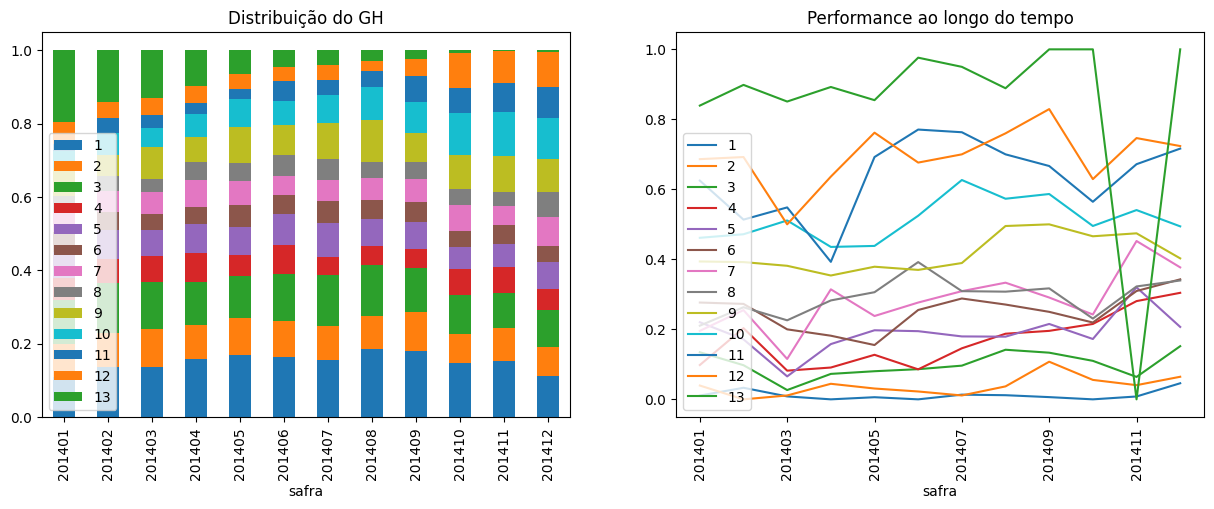

In [200]:
plot_gh(base, 'safra', 'y', 'gh')

> Podemos ver que os GH's maiores (com maior proporção de classe 1), perdem um pouco de estabilidade (veja a linha verde).

Vamos fazer uma outra versão, dessa vez mais estável.

In [202]:
base['gh_v2'] = np.where(base['gh'].isin([13, 12, 11]), 11, base['gh'])

In [204]:
base['gh_v2'] = np.where(base['gh_v2'].isin([3, 2]), 2, base['gh_v2'])

In [206]:
base['gh_v2'] = np.where(base['gh_v2'].isin([4, 5, 6]), 3, base['gh_v2'])

In [208]:
base['gh_v2'] = np.where(base['gh_v2'].isin([6, 7, 8]), 4, base['gh_v2'])

In [210]:
base['gh_v2'] = np.where(base['gh_v2'].isin([9, 10]), 5, base['gh_v2'])

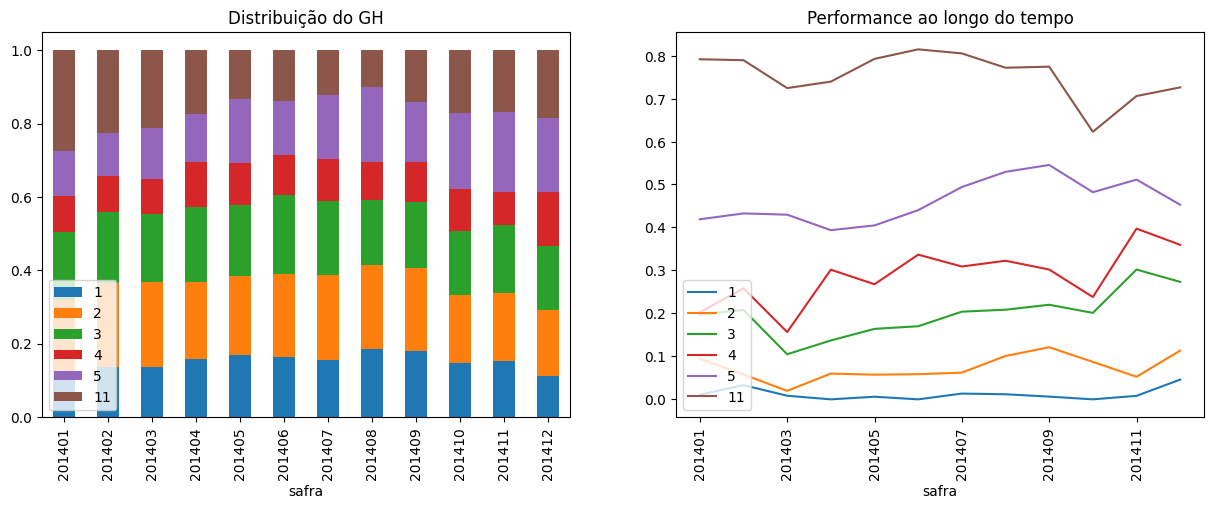

In [211]:
plot_gh(base, 'safra', 'y', 'gh_v2')

> Apesar de ainda não ser perfeito. Podemos ver que essa versão é mais estável (menos GHs). Interessante notar como a performance do gh "11" se manteve constante, e a variação da volumetria se deve a queda de bad rate nos meses correspondentes.